# Global Stock Price

This report conducts a comprehensive analysis of a dataset containing global stock price information. The dataset includes data related to various stock indices, companies and their stock price details such as opening, highest lowest, closing prices, adjusting closing prices, and traded shares. This dataset is structured around key attributes, including company name, stock ticker symbols, currency and exchange markets.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

## (Global) Seaborn Style

In [2]:
sns.set(style='whitegrid', palette='Set2')

## Data Preprocessing

- Load the dataset
- Check dataset's data types
- Check for missing values and duplicates
- Drop missing values and duplicates
- Check for outliers

### Load the Dataset

- Display the first 20 rows of the dataset to understand its structure, the data, and to gain insights into the attributes.

In [3]:
ds = pd.read_csv("assets/dataset.csv")
ds.head(20) 

,company_public,stock_ticker,yahoo_finance_ticker,currency,exchange,opening_price,highest_price,lowest_price,closing_price,adjusted_closing_price,traded_shares,company
0,AEX-Index,^AEX,^AEX,EUR,AMS,730.65,731.91,721.29,724.18,724.18,43000,NaN
1,Austrian Traded Index in EUR,^ATX,^ATX,EUR,VIE,3170.08,3191.83,3118.64,3128.03,3128.03,3145900,NaN
2,S&P/ASX ALL AUSTRALIAN 50,^AXAF,^AXAF,AUD,ASX,7160.40,7160.40,7118.60,7129.60,7129.60,0,NaN
3,S&P/ASX ALL AUSTRALIAN 200,^AXAT,^AXAT,AUD,ASX,7046.60,7049.90,7013.10,7032.00,7032.00,483100,NaN
4,S&P/ASX 200 Cons Disc,^AXDJ,^AXDJ,AUD,ASX,3062.90,3068.40,3034.40,3035.20,3035.20,27580900,NaN
5,S&P/ASX 200 Financials,^AXFJ,^AXFJ,AUD,ASX,6304.10,6304.10,6251.30,6284.70,6284.70,35473700,NaN
6,S&P/ASX 200 Health Care,^AXHJ,^AXHJ,AUD,ASX,37455.90,37457.70,36953.30,36953.30,36953.30,7957900,NaN
7,S&P/ASX 200 Info Tech,^AXIJ,^AXIJ,AUD,ASX,1721.50,1729.80,1702.70,1719.10,1719.10,4630500,NaN
8,S&P/ASX 200,^AXJO,^AXJO,AUD,ASX,7048.60,7051.50,7014.90,7033.20,7033.20,484800,NaN
9,S&P/ASX 200 RESOURCES,^AXJR,^AXJR,AUD,ASX,5866.20,5898.30,5844.70,5892.20,5892.20,278907600,NaN


As you can see, the dataset contains the following columns:

- `company_public` - Company name
- `stock_ticker` - Stock ticker symbol
- `yahoo_finance_ticker` - Yahoo finance ticker symbol
- `currency` - Currency of the stock price
- `exchange` - Exchange market
- `opening_price` - Opening price of the stock
- `highest_price` - Highest price of the stock
- `lowest_price` - Lowest price of the stock
- `closing_price` - Closing price of the stock
- `adjusted_closing_price` - Adjusted closing price of the stock
- `traded_shares` - Number of shares traded
- `company` - Company name (same as `company_public`)

### Check Dataset's Data Types

- Check the data type of each column in the dataset to understand the attributes.

In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45729 entries, 0 to 45728
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   company_public          45722 non-null  object 
 1   stock_ticker            45728 non-null  object 
 2   yahoo_finance_ticker    45729 non-null  object 
 3   currency                45722 non-null  object 
 4   exchange                45722 non-null  object 
 5   opening_price           45729 non-null  float64
 6   highest_price           45729 non-null  float64
 7   lowest_price            45729 non-null  float64
 8   closing_price           45729 non-null  float64
 9   adjusted_closing_price  45601 non-null  float64
 10  traded_shares           45729 non-null  int64  
 11  company                 2232 non-null   object 
dtypes: float64(5), int64(1), object(6)
memory usage: 4.2+ MB


### Check for Missing Values and Duplicates

- Check for missing values in the dataset, and if any are found, drop them.
- Check for duplicates in the dataset, and if any are found, drop them.


In [5]:
ds.isnull().sum()

company_public                7
stock_ticker                  1
yahoo_finance_ticker          0
currency                      7
exchange                      7
opening_price                 0
highest_price                 0
lowest_price                  0
closing_price                 0
adjusted_closing_price      128
traded_shares                 0
company                   43497
dtype: int64

As you notice, there are missing values in the dataset. Let's drop them.

In [6]:
ds.dropna(inplace=True)

Let's display the new dataset after dropping the missing values. Let's display the first 20 rows of the dataset to understand its structure, the data, and to gain insights into the attributes.

In [7]:
ds.head(20)

,company_public,stock_ticker,yahoo_finance_ticker,currency,exchange,opening_price,highest_price,lowest_price,closing_price,adjusted_closing_price,traded_shares,company
14893,Argo Blockchain,ARB,ARB.L,GBP,LSE,8.1250,8.6700,8.0000,8.6700,8.6700,1836825,Argo Blockchain
14895,Arbuthnot Banking Group,ARBB,ARBB.L,GBP,LSE,964.7000,964.7000,964.7000,965.0000,965.0000,1000,Argo Blockchain
14903,Arcontech Group,ARC,ARC.L,GBP,LSE,98.0000,98.9000,96.0000,97.5000,97.5000,4450,Argo Blockchain
14916,Arc Minerals,ARCM,ARCM.L,GBP,LSE,2.6250,2.6800,2.3000,2.6500,2.6500,7347334,Argo Blockchain
14946,Argos Resources,ARG,ARG.L,GBP,LSE,0.0035,0.0035,0.0035,0.0035,0.0035,0,Argo Blockchain
14955,Argo Group,ARGO,ARGO.L,GBP,LSE,7.0000,6.0000,6.0000,7.0000,7.0000,190,Argo Blockchain
14956,Argan,ARGP,ARGP.L,GBP,YHD,67.5000,67.5000,67.5000,67.5000,67.5000,0,Argo Blockchain
14980,Arix Bioscience,ARIX,ARIX.L,GBP,LSE,125.0000,126.4000,124.0000,124.0000,124.0000,35277,Argo Blockchain
15026,Aurora Investment Trust,ARR,ARR.L,GBP,LSE,208.0000,209.0000,206.0000,206.0000,206.0000,110468,Argo Blockchain
15036,Asiamet Resources,ARS,ARS.L,GBP,LSE,1.0750,1.0740,0.9500,0.9750,0.9750,8336636,Argo Blockchain


In [8]:
ds.duplicated().sum()

0

#### Check for Outliers

- First, let's describe the dataset to understand the distribution of the data.
- Then, we will check for outliers using box plots.

In [9]:
ds.describe()

,opening_price,highest_price,lowest_price,closing_price,adjusted_closing_price,traded_shares
count,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2.209000e+03
mean,620.000477,623.212251,614.545396,630.056457,630.056457,1.900154e+06
std,3965.864118,3976.917599,3946.078163,3981.689347,3981.689347,1.429104e+07
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,5.430000,5.400000,5.333000,5.795000,5.795000,0.000000e+00
50%,29.020000,29.000000,28.900000,29.980000,29.980000,1.319600e+04
75%,131.000000,133.010000,130.000000,133.100000,133.100000,2.745920e+05
max,108625.000000,108662.000000,107917.000000,108648.000000,108648.000000,3.556711e+08


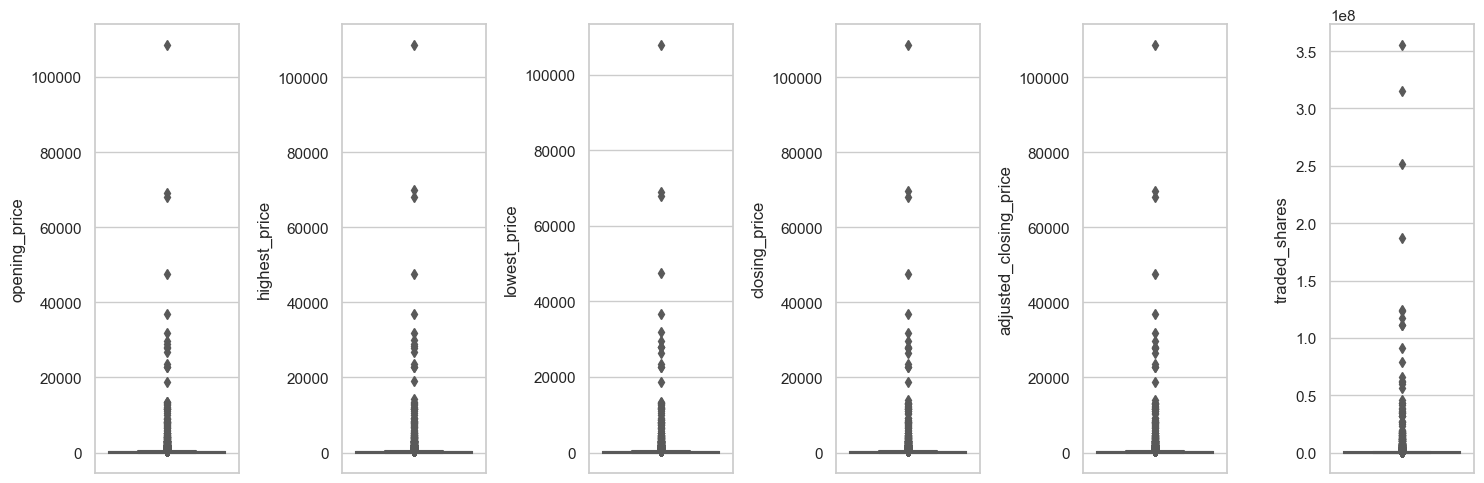

In [10]:
# Plot box plots for us to check for outliers
plt.figure(figsize=(15, 5))
plt.subplot(1, 6, 1)
sns.boxplot(y=ds['opening_price'])
plt.subplot(1, 6, 2)
sns.boxplot(y=ds['highest_price'])
plt.subplot(1, 6, 3)
sns.boxplot(y=ds['lowest_price'])
plt.subplot(1, 6, 4)
sns.boxplot(y=ds['closing_price'])
plt.subplot(1, 6, 5)
sns.boxplot(y=ds['adjusted_closing_price'])
plt.subplot(1, 6, 6)
sns.boxplot(y=ds['traded_shares'])

plt.tight_layout()
plt.show()

As you can see from the box plots, there are outliers in the dataset. We will address these outliers in the subsequent sections.

##### Remove Outliers

In [11]:
Q1 = ds.quantile(0.25, numeric_only=True)
Q3 = ds.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Align the DataFrame and Series before performing the comparison
ds, lower_bound = ds.align(lower_bound, axis=1, copy=False)
ds, upper_bound = ds.align(upper_bound, axis=1, copy=False)

# Filter the DataFrame based on the lower and upper bounds
ds = ds[~((ds < lower_bound) | (ds > upper_bound)).any(axis=1)]

# Display the new dataset after removing outliers
ds.describe()

,adjusted_closing_price,closing_price,highest_price,lowest_price,opening_price,traded_shares
count,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000
mean,43.491036,43.491036,43.394895,42.425760,43.161385,74295.341748
std,60.775730,60.775730,61.489535,59.844083,60.974510,144526.113329
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.930000,3.930000,3.450000,3.390000,3.450000,0.000000
50%,18.600000,18.600000,18.037900,17.920000,17.962000,3000.000000
75%,55.500000,55.500000,55.500000,53.400000,55.000000,63069.000000
max,315.000000,315.000000,320.000000,309.000000,312.000000,686055.000000


As you can see, the outliers have been removed from the dataset. The subsequent analysis will be based on this cleaned dataset.

## Descriptive Statistics

- Display summary statistics for numeric columns (`opening_price`, `highest_price`, `lowest_price`, `closing_price`, `adjusted_closing_price`, and `traded_shares`) in the dataset.
    - Mean
    - Median (50th Percentile)
    - Standard Deviation
    - Minimum
    - Maximum
    - 25th Percentile
    - 75th Percentile
    - Count

In [12]:
# Create a column list for descriptive statistics
numeric_columns = ['opening_price', 'highest_price', 'lowest_price', 'closing_price', 'adjusted_closing_price', 'traded_shares']

# Calculate descriptive statistics
summary_statistics = ds[numeric_columns].describe()

# Extract the required statistics and display them
summary_statistics = summary_statistics.loc[['mean', 'std', 'min', 'max', '50%', '25%', '75%', 'count']]
summary_statistics

,opening_price,highest_price,lowest_price,closing_price,adjusted_closing_price,traded_shares
mean,43.161385,43.394895,42.425760,43.491036,43.491036,74295.341748
std,60.974510,61.489535,59.844083,60.775730,60.775730,144526.113329
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,312.000000,320.000000,309.000000,315.000000,315.000000,686055.000000
50%,17.962000,18.037900,17.920000,18.600000,18.600000,3000.000000
25%,3.450000,3.450000,3.390000,3.930000,3.930000,0.000000
75%,55.000000,55.500000,53.400000,55.500000,55.500000,63069.000000
count,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000


## Objectives

For the primary analysis, we will focus on the following objectives:

- **Currency and Exchange Analysis**: Assess the distribution of stock prices by currency and exchange markets, examine the distribution of companies across various currency types and exchange markets, and determine the most prevalent currencies and exchange markets within the dataset.
- **Price Distribution Analysis**: Evaluate the distribution of stock prices, including opening, highest, lowest, closing, and adjusted closing prices, as well as the volume of traded shares.
- **Stock Price Trends**: Investigate the patterns in stock prices over time, pinpoint the companies with the highest and lowest prices, and identify those with the greatest price volatility.
- **Volume of Traded Shares**: Assess the trading volume for each company, highlight those with the highest and lowest volumes, and identify companies with the most notable fluctuations in trading volume.
- **Correlation Analysis**: Perform a correlation analysis to explore the relationships between opening and lowest prices, highest and closing prices, and adjusted closing prices.
- **Variability Analysis**: Measure the variability of stock prices by calculating the standard deviation for opening, highest, lowest, closing, and adjusted closing prices.
- **Company Analysis**: Evaluate the stock prices of individual companies, identify those with the highest and lowest prices, and determine which companies experience the most significant price changes.

### Currency and Exchange Analysis

- Explore the distribution of stock prices based on currency and exchange markets.
- Identify the most common currencies and exchange markets.

#### Currency Analysis

In [13]:
# Count the number of unique currencies in the dataset
currency_counts = ds['currency'].value_counts()
currency_counts

USD    588
GBP    425
EUR    333
CAD     90
AUD     36
INR     20
BRL     13
CHF      9
NZD      8
SEK      8
MXN      7
IDR      3
CNY      1
SGD      1
ISK      1
DKK      1
PLN      1
Name: currency, dtype: int64

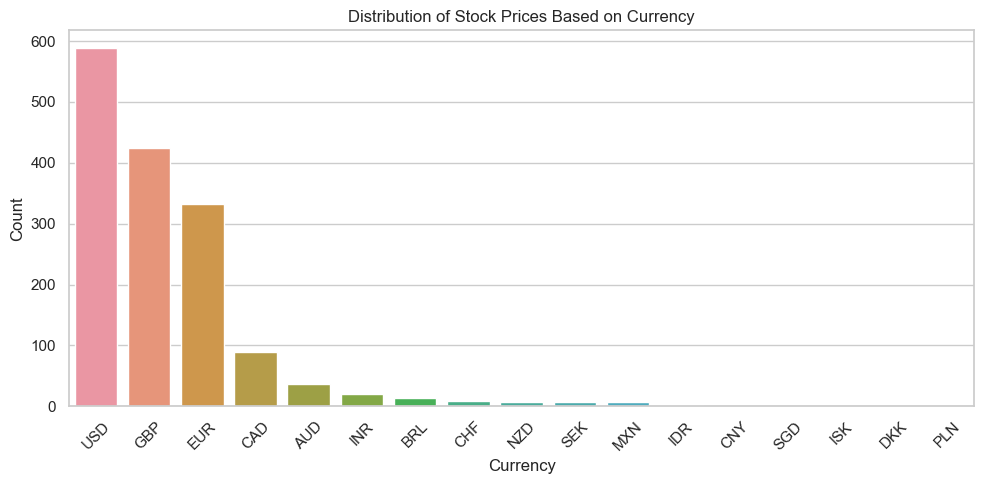

In [14]:
# Plot the distribution of stock prices based on currency
plt.figure(figsize=(10, 5))
sns.countplot(data=ds, x='currency', order=currency_counts.index)
plt.title('Distribution of Stock Prices Based on Currency')
plt.xlabel('Currency')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

As you can see on the chart, the most common currency in the dataset is `GBP`, followed by `USD`, `EUR`, and `CAD`. This analysis provides insights into the distribution of stock prices based on currency.

#### Exchange Analysis

In [15]:
# Count the number of unique exchange markets in the dataset
exchange_counts = ds['exchange'].value_counts()
exchange_counts

LSE    542
FRA    249
PNK    240
NYQ     69
TOR     66
NMS     60
NCM     40
ASX     36
NGM     35
PCX     29
NSI     18
GER     17
EBS     16
VAN     16
YHD     13
SAO     13
PAR     10
MIL      9
NZE      8
HEL      8
STO      8
BTS      8
ASE      6
MEX      6
CNQ      6
AMS      5
VIE      4
JKT      3
MCE      1
ICE      1
CPH      1
BRU      1
WSE      1
Name: exchange, dtype: int64

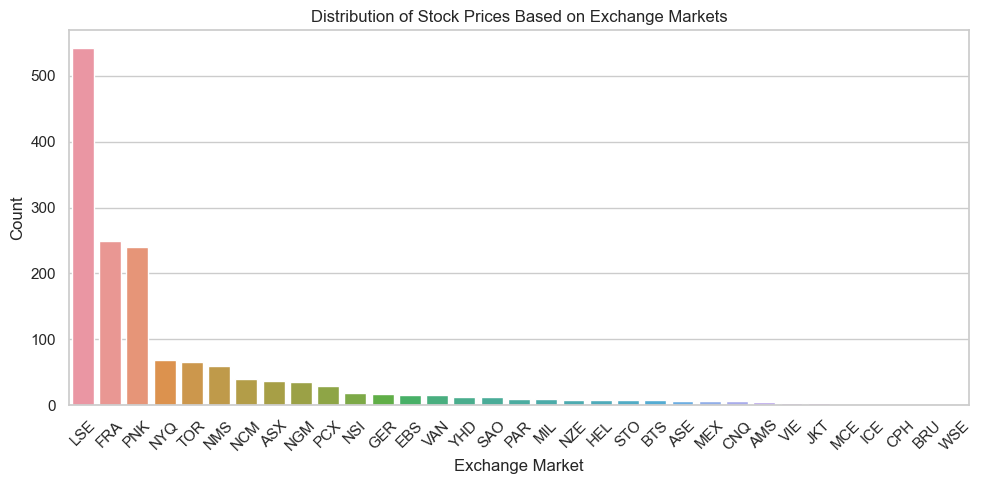

In [16]:
# Plot the distribution of stock prices based on exchange markets
plt.figure(figsize=(10, 5))
sns.countplot(data=ds, x='exchange', order=exchange_counts.index)
plt.title('Distribution of Stock Prices Based on Exchange Markets')
plt.xlabel('Exchange Market')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

As you can see on the chart, the most common exchange market in the dataset is `LSE`, followed by `FRA`, `PNK`, and `NYQ`. This analysis provides insights into the distribution of stock prices based on exchange markets.